# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [2]:
data = pd.read_csv('weight-height.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [3]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
male_df =  data.loc[data['Gender']=='Male']
female_df =  data.loc[data['Gender']=='Female']

In [5]:
# Male Height mean: 69.02634590621737
print ('Male Height mean: {}'.format(male_df['Height'].mean()))
# Male Height sd: 2.8633622286606517
print ('Male Height mean: {}'.format(male_df['Height'].std()))
# Male Weight mean: 187.0206206581929
print ('Male Height mean: {}'.format(male_df['Weight'].mean()))
# Male Weight sd: 19.781154516763813
print ('Male Height mean: {}'.format(male_df['Weight'].std()))
# Female Height mean: 63.708773603424916
print ('Male Height mean: {}'.format(female_df['Height'].mean()))
# Female Height sd: 2.696284015765056
print ('Male Height mean: {}'.format(female_df['Height'].std()))
# Female Weight mean: 135.8600930074687
print ('Male Height mean: {}'.format(female_df['Weight'].mean()))
# Female Weight sd: 19.022467805319007
print ('Male Height mean: {}'.format(female_df['Weight'].std()))

Male Height mean: 69.02634590621741
Male Height mean: 2.863362228660647
Male Height mean: 187.0206206581932
Male Height mean: 19.7811545167638
Male Height mean: 63.70877360342507
Male Height mean: 2.696284015765054
Male Height mean: 135.86009300746835
Male Height mean: 19.022467805319028


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

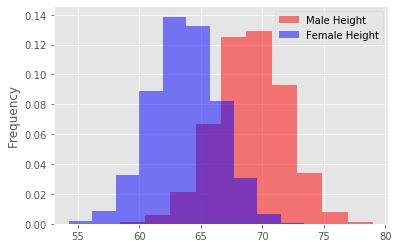

In [6]:
plt.hist(male_df['Height'], bins=10, density=True, color='red', label='Male Height', alpha=0.5)
plt.hist(female_df['Height'], bins=10, density=True, color='blue', label='Female Height', alpha=0.5)
plt.legend()
plt.ylabel('Frequency')
plt.show()

In [7]:
# Record your observations - are these inline with your personal observations?


## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

In [8]:
n, bins = np.histogram(data.Height, 20, density=1)
len(n) , len(bins)

(20, 21)

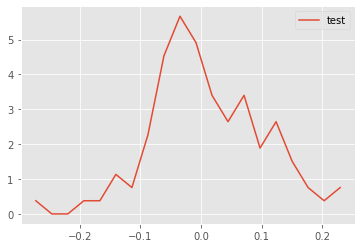

In [9]:
def density(x):
    n, bins = np.histogram(x, 20, density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    return pdfx , pdfy

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()
plt.show()

## Add overlapping density plots to the histograms plotted earlier

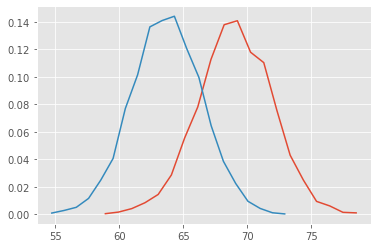

In [10]:
# Your code here 
x,y = density(male_df['Height'])
plt.plot(x,y, label = 'Male Height')
n,m = density(female_df['Height'])
plt.plot(n,m, label = 'Female Height')
plt.show()

## Repeat the above exercise for male and female weights

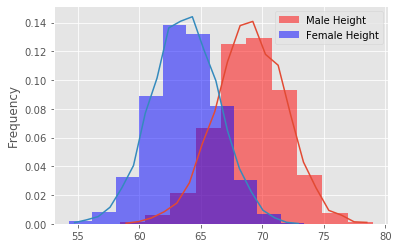

In [11]:
# Your code here
plt.hist(male_df['Height'], bins=10, density=True, color='red', label='Male Height', alpha=0.5)
plt.hist(female_df['Height'], bins=10, density=True, color='blue', label='Female Height', alpha=0.5)
plt.legend()
plt.ylabel('Frequency')
x,y = density(male_df['Height'])
plt.plot(x,y, label = 'Male Height')
n,m = density(female_df['Height'])
plt.plot(n,m, label = 'Female Height')
plt.show()

## Write your observations in the cell below

In [12]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?

## Repeat the above experiments in seaborn and compare with your results

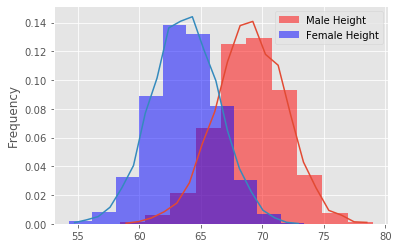

In [13]:
# Code for heights here
plt.hist(male_df['Height'], bins=10, density=True, color='red', label='Male Height', alpha=0.5)
plt.hist(female_df['Height'], bins=10, density=True, color='blue', label='Female Height', alpha=0.5)
plt.legend()
plt.ylabel('Frequency')
x,y = density(male_df['Height'])
plt.plot(x,y, label = 'Male Height')
n,m = density(female_df['Height'])
plt.plot(n,m, label = 'Female Height')
plt.show()

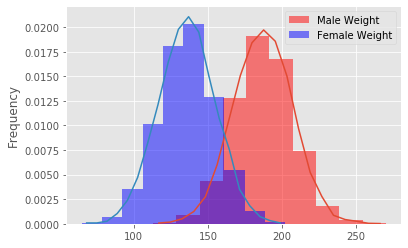

In [14]:
# Code for weights here
plt.hist(male_df['Weight'], bins=10, density=True, color='red', label='Male Weight', alpha=0.5)
plt.hist(female_df['Weight'], bins=10, density=True, color='blue', label='Female Weight', alpha=0.5)
plt.legend()
plt.ylabel('Frequency')
x,y = density(male_df['Weight'])
plt.plot(x,y, label = 'Male Weight')
n,m = density(female_df['Weight'])
plt.plot(n,m, label = 'Female Weight')
plt.show()

In [15]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.